## Coding Challenge

In [19]:
import pandas as pd
import numpy as np
import joblib
import sys, os
import dateutil
from datetime import datetime, timedelta
from glob import glob
import matplotlib.pyplot as plt
import japanize_matplotlib
sys.path.append('../..')
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
df_pipe = pd.read_csv('./fracta_Dec3.csv')
df_wk = df_pipe
display(df_wk.head())

,pipe_id,install_year,material,diameter,break_year,env_dat_0,env_dat_1,env_dat_2,env_dat_3,env_dat_4,...,env_dat_135,env_dat_136,env_dat_137,env_dat_138,env_dat_139,env_dat_140,env_dat_141,env_dat_142,env_dat_143,env_dat_144
0,P0000000000,1985,D,20.32,NaN,623.542175,18.052843,14.161422,10.268579,159.662827,...,554.479675,20.000000,0.000038,438.628143,27.000000,3085.786865,0.002728,0.311803,0.0,0.0
1,P0000000001,1934,C,15.24,NaN,644.830017,17.790001,13.830000,9.870000,257.001221,...,276.357605,9.200573,0.304329,239.719299,32.571018,3188.292236,0.003291,0.322161,0.0,0.0
2,P0000000002,1904,C,20.32,NaN,604.570007,18.219999,14.350000,10.470000,225.165039,...,236.882950,4.872639,0.182168,500.638367,28.978306,4542.257324,0.002928,0.458972,0.0,0.0
3,P0000000003,1979,D,15.24,NaN,573.424011,17.671381,14.132636,10.586646,170.244339,...,321.886658,12.353504,0.480517,295.554504,41.983772,4521.720215,0.004242,0.456897,0.0,0.0
4,P0000000004,1987,D,20.32,NaN,583.429993,18.280001,14.350000,10.420000,171.034073,...,758.841431,25.052542,0.021532,778.687256,25.842377,4978.718262,0.002611,0.503074,0.0,0.0


- 全体で56774件のレコードが存在し、そのうち故障件数は3144
- およそ5.5%程に故障年が存在する

In [28]:
total = len(df_wk)
death = len(df_wk['break_year'][df_pipe['break_year'].notna()])

display(total)
display(death)
display(death/total)

56774

3144

0.05537746151407334

- 年数を算出する
- 分布を見る

In [29]:
df_wk['death'].mask(df_wk['break_year'].notna(), True)

KeyError: 'death'

<AxesSubplot:>

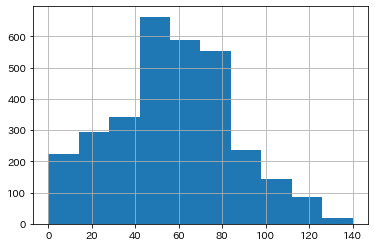

In [26]:
df_pipe['break_year'].fillna('2022')
df_pipe['age'] = df_pipe['break_year'] - df_pipe['install_year']

df_pipe['age'].hist()